## Imports:
Imports all needed libraries and functions
set up a dataframe

In [1]:
#Pandas is a python library for data manipulation and analysis
import pandas as pd
#sklearn is a machine learning library
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import sklearn
#matplotlib is a graphing library
import matplotlib.pyplot as plt
#import maths modules
import math
import numpy
#tensorflow 
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score


#Import the fortune 500 dataset and put it into a python digestible data frame
df = pd.read_csv("FF500.csv")

## Setting up data

Remove all obsolete data

In [2]:
#Split our data into a number of more easily accessible sets:
#This is part of prec-processing
#Some data was considered obsolete and a column will not be produced for it

#dictionary of useful columns
columns = {"Rank":[], "Title":[], "Employees":[], "Sector":[], "Industry":[], "Hqcity":[], "Hqstate":[], "Revenues":[], "Revchange":[], "Profits":[], "Prftchange":[], "Assets":[], "Totshequity":[]}

df.drop(labels=[129,195,196,202,378,484], axis = 0, inplace=True)
#generated list of values for each column, stored as arrays within the dict
for i in columns:
    columns[i] = df[i].tolist()



## Pre-processing

Normalise values  
Convert all to numeric types  
Remove anomolous data  

In [3]:
#pre-processing - replacing text values with integer values and producing a reference dict
# Sector, Industry, Hqcity, Hqstate must be altered


#create dictionary comparing sector to numerical value
sectorDict = {}
#iterate through sector list
for i in range(len(columns["Sector"])):
    #replace sector name with number if currently recorded
    if columns["Sector"][i] in sectorDict:
        #replace value
        temp = sectorDict[columns["Sector"][i]]
        columns["Sector"][i] = temp
    #otherwise create new entry in dict for name and number, then replace sector name with associate number
    else:
        #create new entry
        sectorDict[columns["Sector"][i]] = len(sectorDict) + 1
        #replace value
        temp = sectorDict[columns["Sector"][i]]
        columns["Sector"][i] = temp


#same process for industry as sector
industryDict = {}
for i in range(len(columns["Industry"])):
    if columns["Industry"][i] in industryDict:
        temp = industryDict[columns["Industry"][i]]
        columns["Industry"][i] = temp
    else:
        industryDict[columns["Industry"][i]] = len(industryDict) + 1
        temp = industryDict[columns["Industry"][i]]
        columns["Industry"][i] = temp



#same process for hq city
hqCityDict = {}
for i in range(len(columns["Hqcity"])):
    if columns["Hqcity"][i] in hqCityDict:
        temp = hqCityDict[columns["Hqcity"][i]]
        columns["Hqcity"][i] = temp
    else:
        hqCityDict[columns["Hqcity"][i]] = len(hqCityDict) + 1
        temp = hqCityDict[columns["Hqcity"][i]]
        columns["Hqcity"][i] = temp


#same process for hq state
hqStateDict = {}
for i in range(len(columns["Hqstate"])):
    if columns["Hqstate"][i] in hqStateDict:
        temp = hqStateDict[columns["Hqstate"][i]]
        columns["Hqstate"][i] = temp
    else:
        hqStateDict[columns["Hqstate"][i]] = len(hqStateDict) + 1
        temp = hqStateDict[columns["Hqstate"][i]]
        columns["Hqstate"][i] = temp




#profit change is stored as a string so values must be replaced with float variants
for i in range (len(columns["Prftchange"])):
    #convert from string to float
    columns["Prftchange"][i] = float(columns["Prftchange"][i].replace(",",""))


#produce graphs where anomolous results are removed
def removeAnomolies(data):
    for i in data:
        #remove walmart since it has massive employee base & revenues
        del data[i][0]
        #remove apple for massive profit
        del data[i][1]
        #remove computer science for massive prftschange
        del data[i][376]
    

#lets user decide whether or not to remove anomolies
reduce = input("use dataset w/out anomolies (y/n)?").lower()
if reduce == "y":
    removeAnomolies(columns)
else:
    pass



#use when normalising for k means
for i in range(len(columns["Revenues"])):
    columns["Revenues"][i]/=10000




## Raw Data Graphs

create ascatter plots for raw data

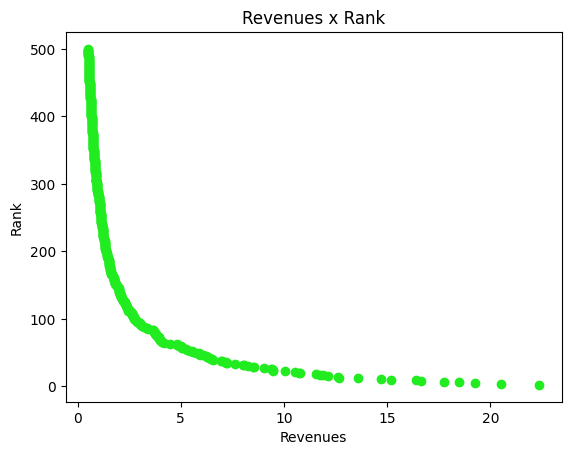

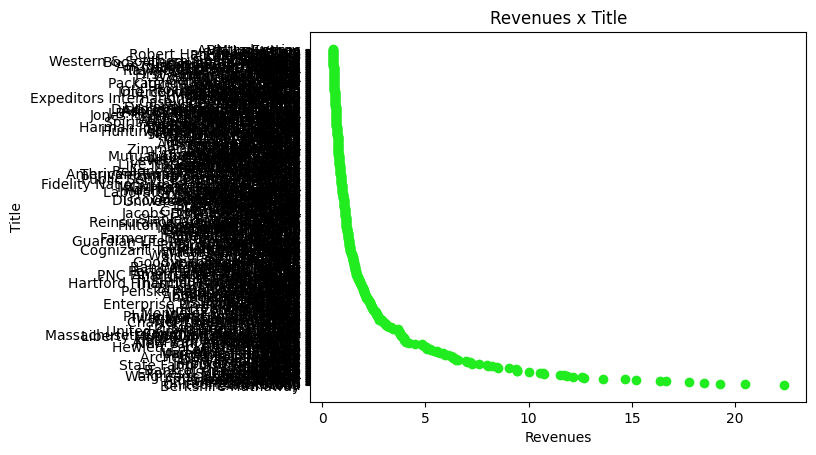

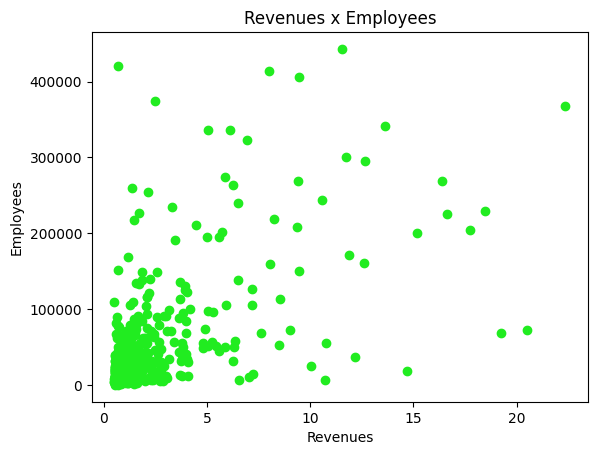

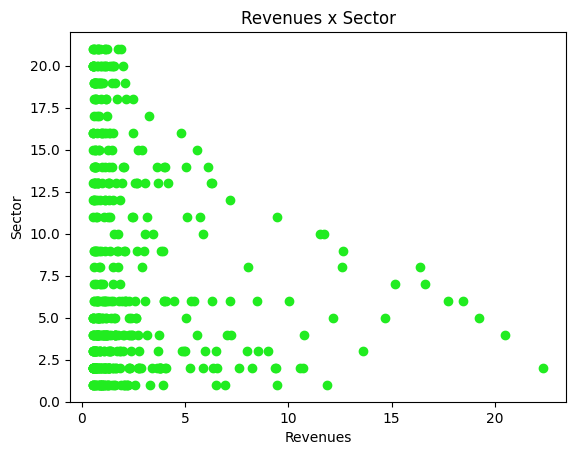

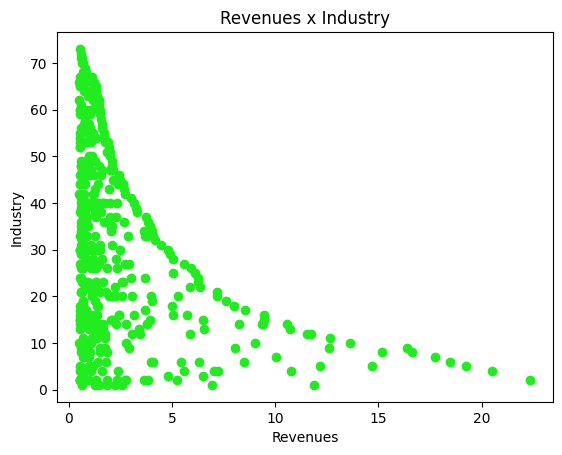

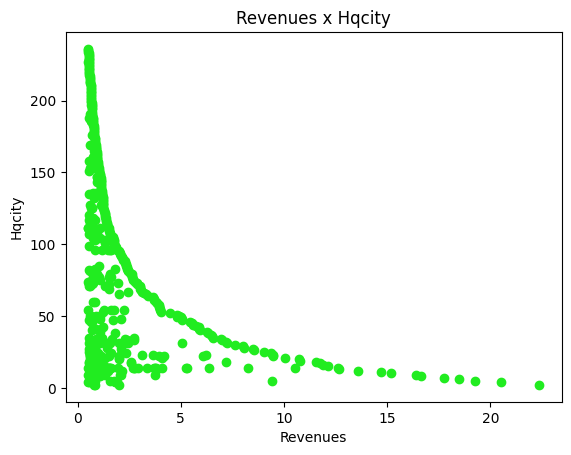

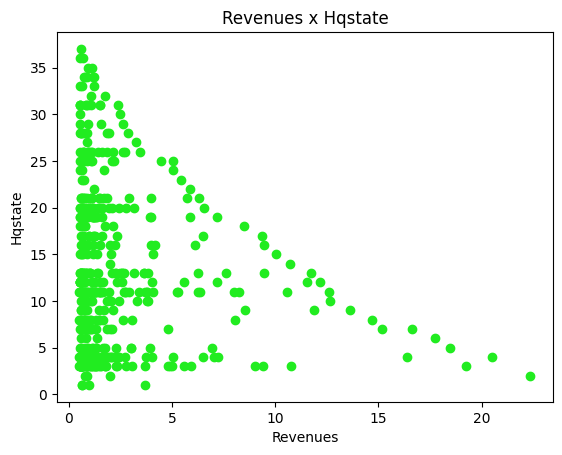

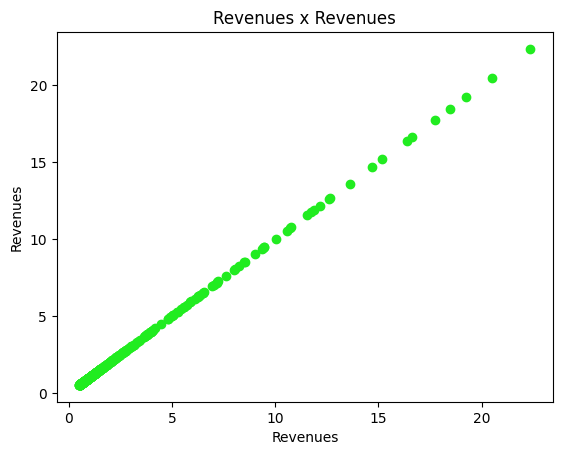

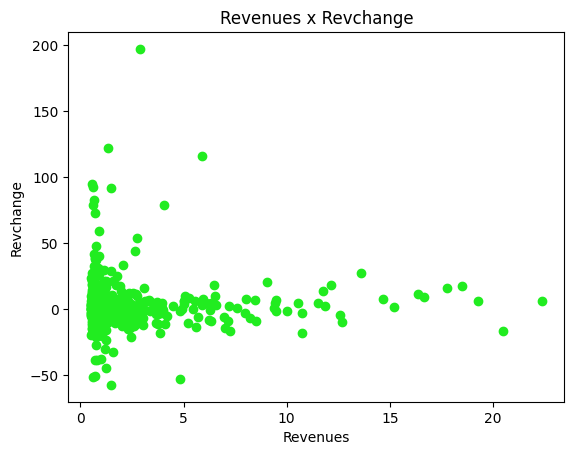

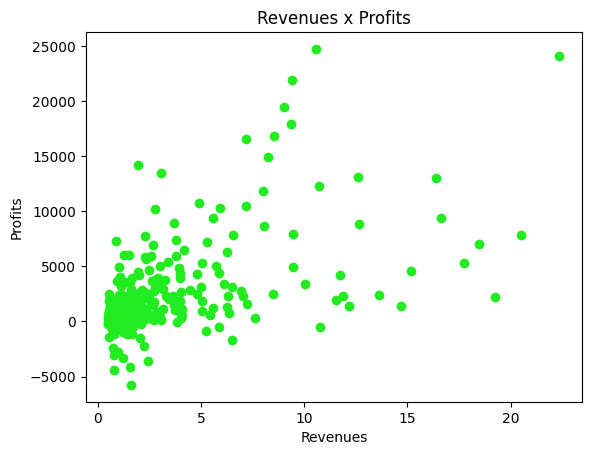

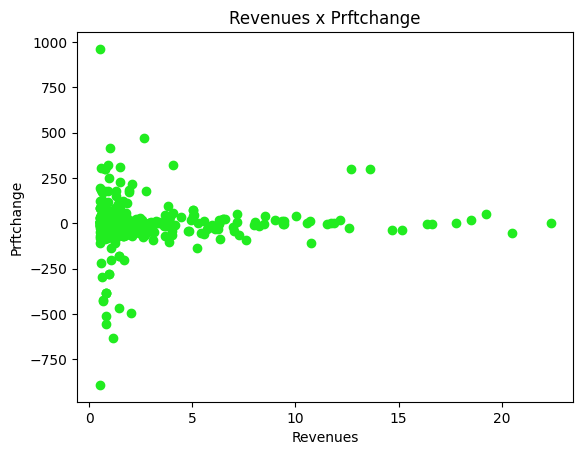

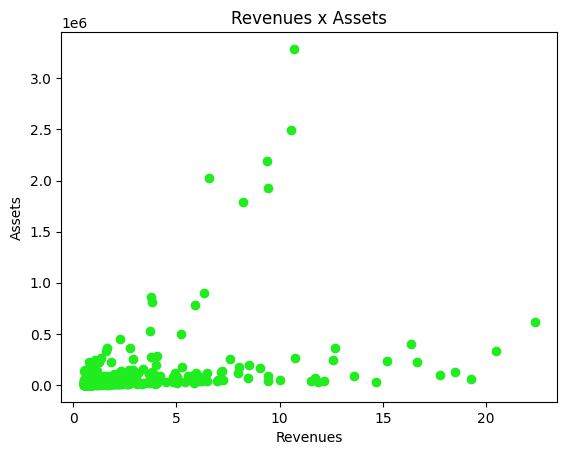

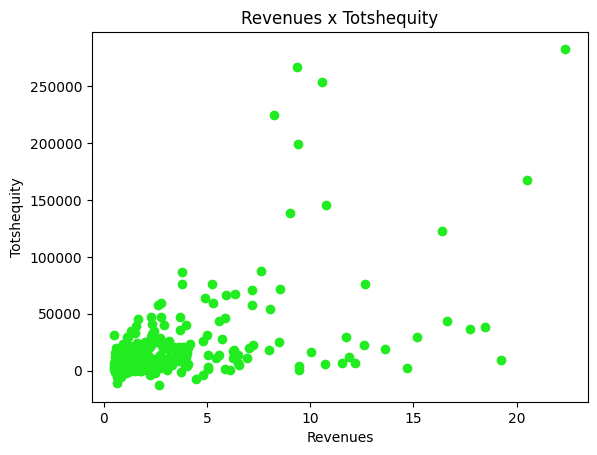

In [4]:
#create scatter graph for all combos w/out any modelling
for i in columns:
    plt.scatter(columns["Revenues"],columns[i], c = "#21ec20")
    plt.xlabel("Revenues")
    plt.ylabel(i)
    plt.title(f"Revenues x {i}")
    plt.show()

Allows user to see all data raw, must remove ''' ... '''

In [5]:

#prints off column and data
'''
for i in columns:
    print(i)
    print(columns[i])
'''

'\nfor i in columns:\n    print(i)\n    print(columns[i])\n'

## K-means hyperparameter processing

includes:
- Elbow method
- Way of deducing the elbow
- Fast numerical method
- Silhouette method
- Bar chart production for silhouette method

And code to perform this calcs

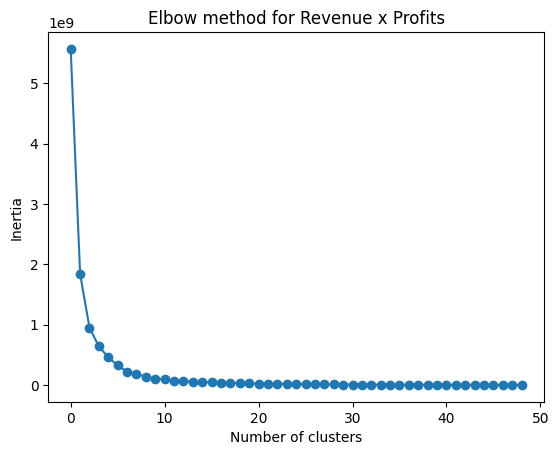

Best Elbow value is: 2


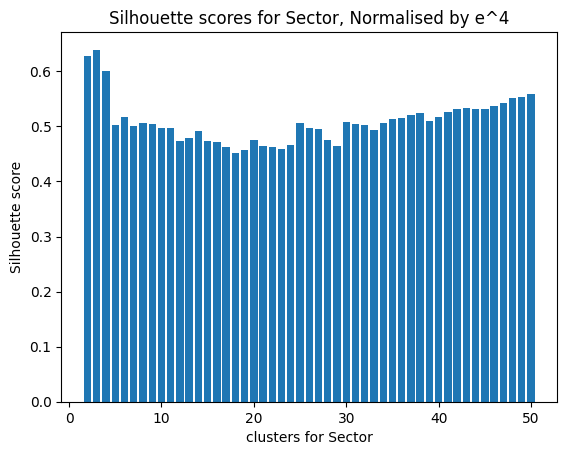

0.639203197446141
3


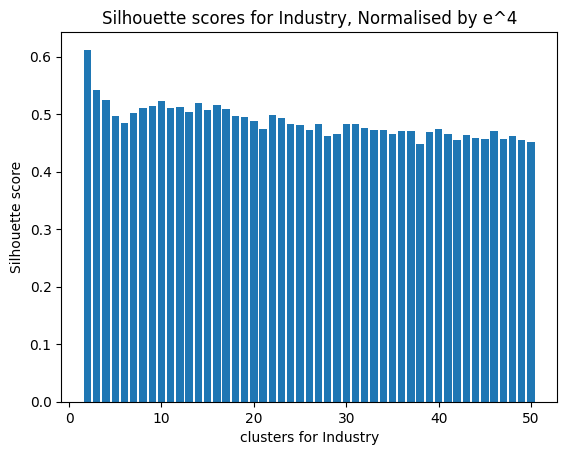

0.6119336273493581
2


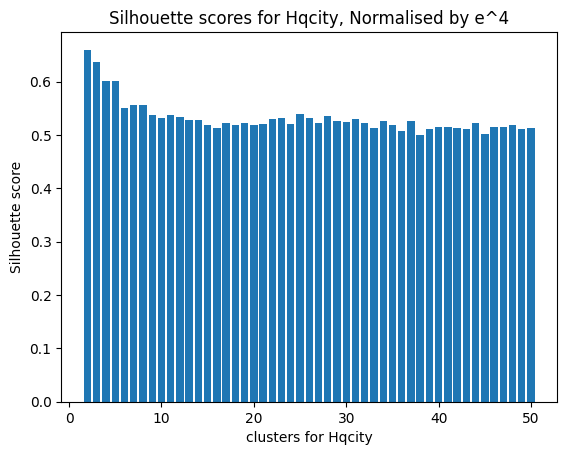

0.6598095340392849
2


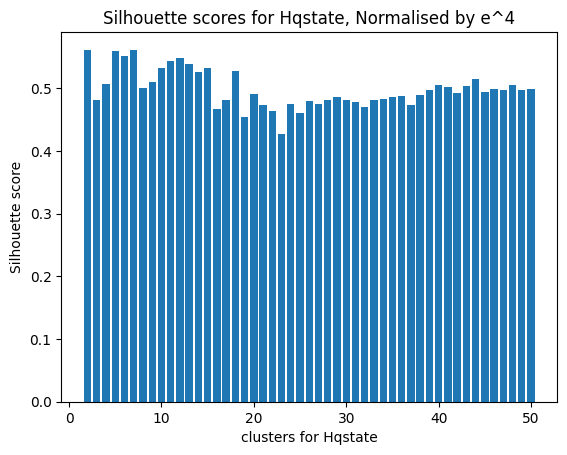

0.5616049557637974
2
numerical method = 16


In [6]:
#calculating the hyper parameters
#no. of clusters - few approaches
#go over and consolidate cluster no
#tolerence

#needed to prevent memory leaks
OMP_NUM_THREADS=2

#elbow method
def elbowMethod (subject):
    #combines revenues with another column into a list of tuples
    data = list(zip(columns["Revenues"], columns[subject]))
    #measures relative success -> Inertia is the sum of squared distance of samples to their closest cluster center
    inertias = []

    #iterates through tuples, the round(x/10) was added as many obsolete calculations were being performed, increasing calcuation time and decreasing
    #legibility of the graph
    for i in range(round(len(columns["Revenues"])/10)):
        #perform k means withe new cluster No
        kmeans = KMeans(n_clusters=i+1)
        #check effectivity
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    #plot a graph displaying effectivity of different cluster no.
    plt.plot(range(round(len(columns["Revenues"])/10)), inertias, marker="o")
    plt.title(f"Elbow method for Revenue x {subject}")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()


    return(inertias)






#find best k value from elbow values by finding the greatest difference in gradient between two line segments
def findElbowBest(data):
    gradientList = []
    #calc dy/dx for each segment
    for i in range(1,len(data)-1):
        #data[i][0] first x
        #data[i][1] first y
        #data[i+1][0] 2nd x
        #data[i+1][1] 2nd y
        #append all possible values to list
        grad = (data[i][0] - data[i+1][0])/(data[i][1]-data[i+1][1])
        gradientList.append(grad)
        #return index of greatest diff in gradient -> the Elbow
    
    maxDif = 0
    changePoint = 0
    for i in range(len(gradientList)-1):
        #gradient 1 = gradientList[i]
        #gradient 2 = gradientList[i+1]
        #calculate if the line segments gradient is larger than the greatest
        if abs(gradientList[i] - gradientList[i+1]) > maxDif:
            maxDif = abs(gradientList[i] - gradientList[i+1])
            changePoint = i+1
    return min(range(len(gradientList)), key=gradientList.__getitem__)+2




#uses numerical methods to calculate k. sqrt(n/2)
def fastNumericalMethod(subject):
    return round(math.sqrt(len(subject)/2))



def silhouetteMethod(subject):
    #create data structure
    data = list(zip(columns["Revenues"],columns[subject]))
    #print(data)
    scores = []
    for i in range(2,51):
        #calc k means
        kmc = KMeans(n_clusters=i, random_state=5)
        kmclabels = kmc.fit_predict(data)
        #give model to silhouette calc
        score = silhouette_score(data, kmclabels)
        scores.append(score)
    #return the sil socres
    return scores


#creates a bar graph using provided socres
def silBarchart(silscores,name):
    plt.bar(range(2, len(silscores)+2), silscores)
    plt.xlabel(f"clusters for {name}")
    plt.ylabel("Silhouette score")
    plt.title(f"Silhouette scores for {name}, Normalised by e^4")
    plt.show()
    #returns the greatest score given
    print(max(silscores))
    return max(range(len(silscores)), key=silscores.__getitem__)+2




#set up for best elbow k - example of failure
e = (elbowMethod("Profits"))
datass = list(zip(e,  [x for x in range(len(e))]))
print(f"Best Elbow value is: {findElbowBest(datass)}")

#performs silhouette method and stores appropriate stuff
silSect = silhouetteMethod("Sector")
silInd = silhouetteMethod("Industry")
silHqc = silhouetteMethod("Hqcity")
silHqs = silhouetteMethod("Hqstate")

optKSect = silBarchart(silSect, "Sector")
print(optKSect)
optKInd = silBarchart(silInd, "Industry")
print(optKInd)
optKHqc = silBarchart(silHqc, "Hqcity")
print(optKHqc)
optKHqs = silBarchart(silHqs, "Hqstate")
print(optKHqs)

#calc the numerical rule of thumb
fnm = fastNumericalMethod(columns["Revenues"])
print(f"numerical method = {fnm}")



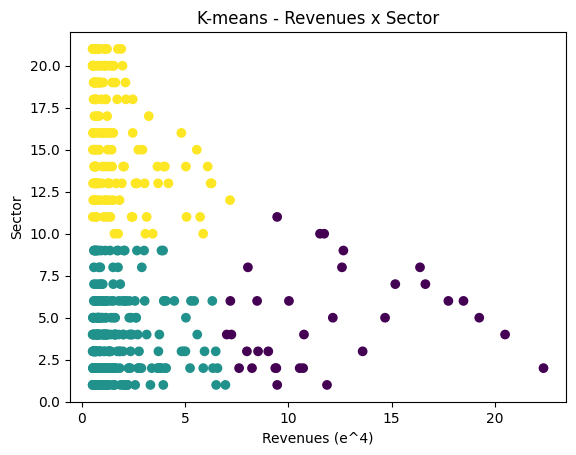

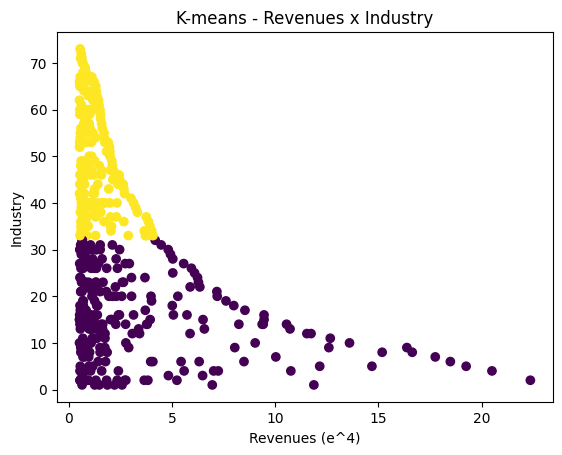

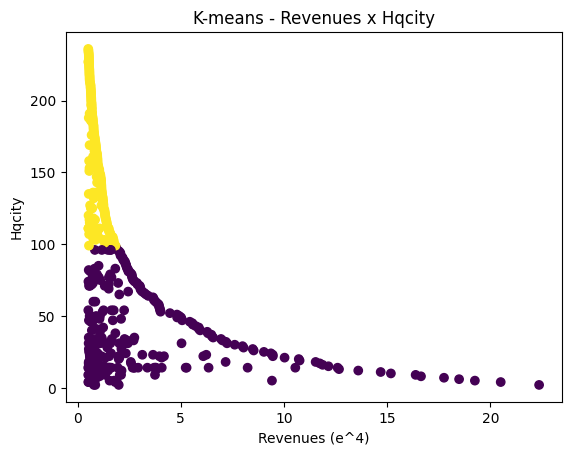

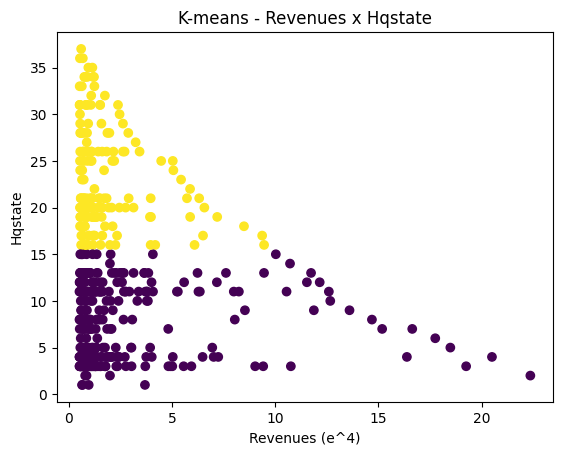

In [7]:

#function to calc and show kmeans graph
def doKMeans(yName, clusterNo):
    #transform two lists revenue and given into a list of tuples
    data = list(zip(columns["Revenues"],columns[yName]))

    #calc k means
    kmeans = KMeans(n_clusters=clusterNo)
    kmeans.fit(data)

    #create and label graph
    plt.scatter(columns["Revenues"],columns[yName], c=kmeans.labels_)
    plt.xlabel("Revenues (e^4)")
    plt.ylabel(yName)
    plt.title(f"K-means - Revenues x {yName}")
    plt.show()


#random centriod initialisation

#kmeans++ is the default and proven best, other methods include random initialisation.


doKMeans("Sector", optKSect)
doKMeans("Industry", optKInd)
doKMeans("Hqcity", optKHqc)
doKMeans("Hqstate", optKHqs)




#print(sectorDict)
#print(industryDict)
#print(hqCityDict)
#print(hqStateDict)


## Polynomial regression

includes:
 - Regression function
 - Function to calculate R-Squared for model
 - Function to iterate through different depths and return a best ...
 - Function to print best score 
 - Function to find simpler model most similar to best 
 - Function to create bar chart comparing R scores
 - Function to create graph displaying final model

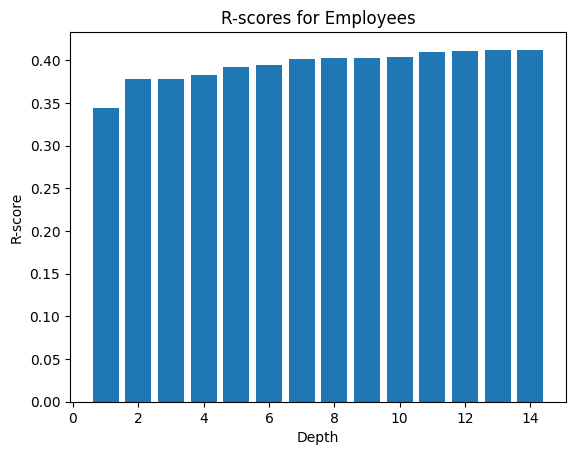

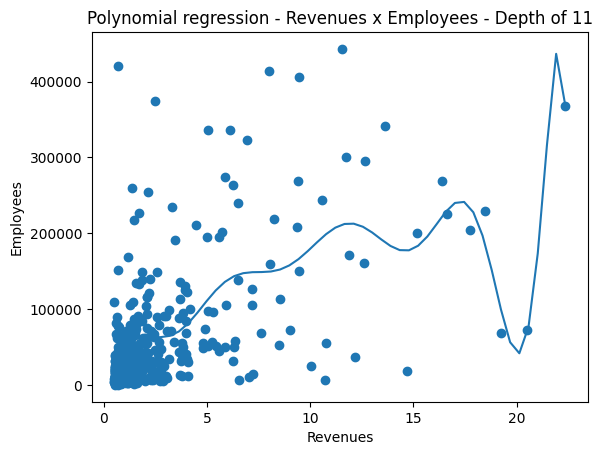

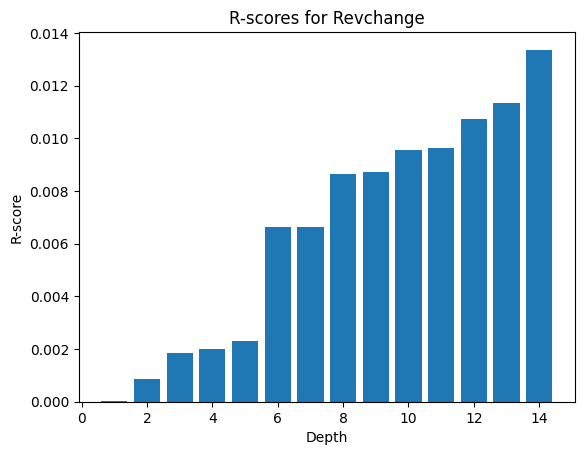

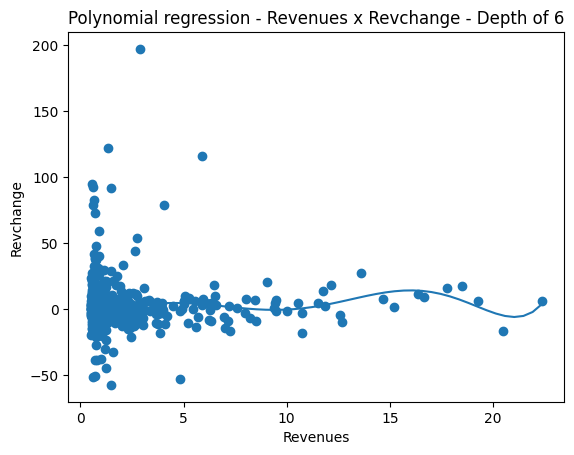

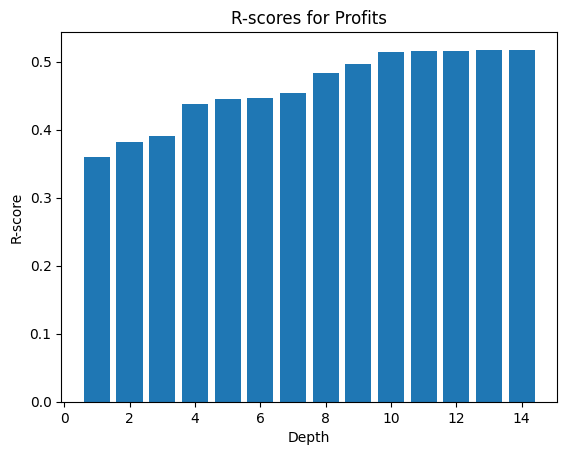

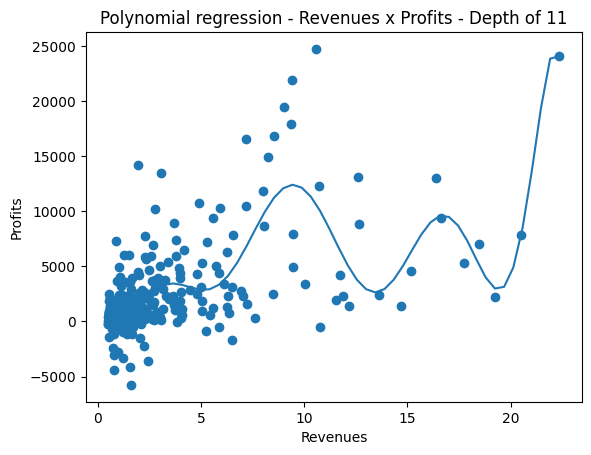

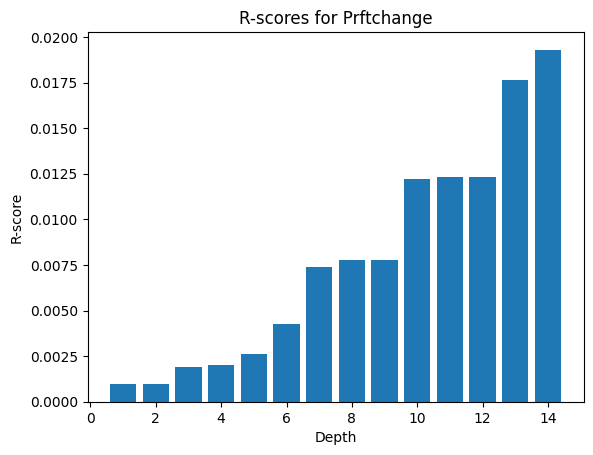

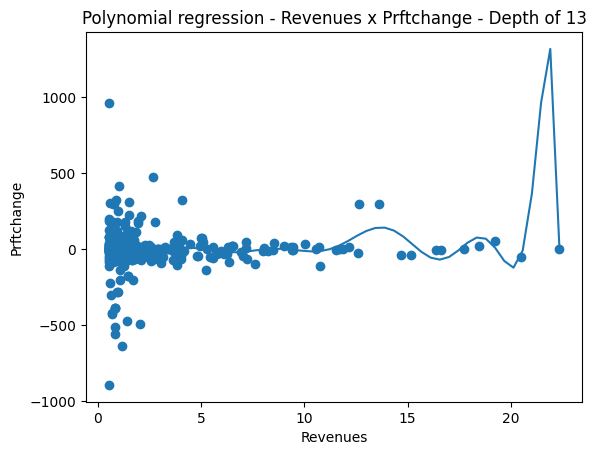

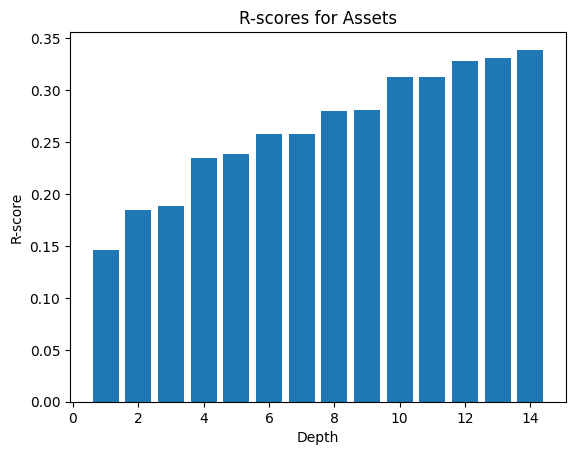

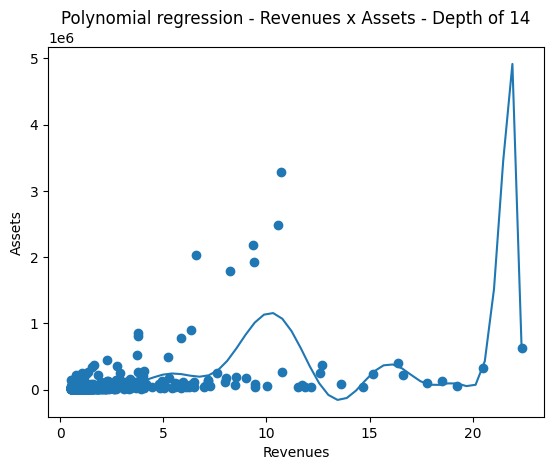

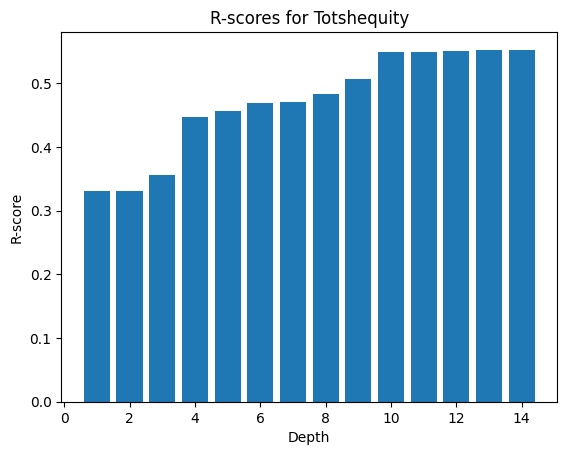

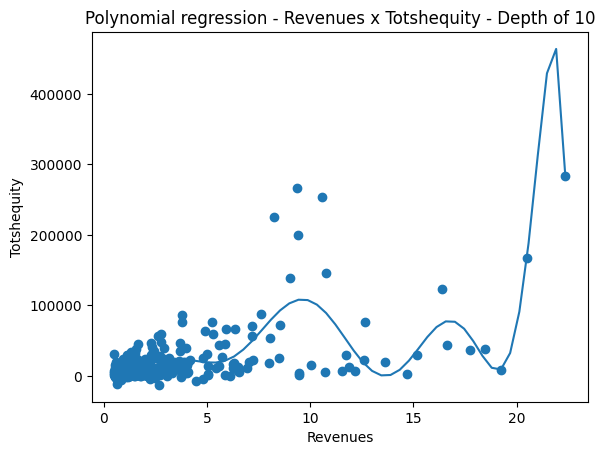

In [8]:
#Polynomial regression
#hyper params = polynomial depth

#performs the regression and plots onto a graph
def polyReg(depth, subject):
    #calc polynomial regression line using numpy.
    model = numpy.poly1d(numpy.polyfit(columns["Revenues"], columns[subject], depth))
    line = numpy.linspace(min(columns["Revenues"]),max(columns["Revenues"]), endpoint=True)
    return model

#calculates R values - how effective the model is 
def calcR(model, subject):
    #uses sklearn function to calc sum of mean squared error
    rScore = r2_score(columns[subject], model(columns["Revenues"]))
    return rScore


#function to calc optimal polynomial depth
def optimisePR(maxDepth, subject):
    #create a list of all r scores in given range, record polynomial depth and rscore
    rScores = []
    depths = []
    for i in range(1, maxDepth):
        rScores.append(calcR(polyReg(i,subject), subject))
        depths.append(i)
    return rScores, depths

    

#calc which of depths performs best using r score
def findBest(rScores):
    maxVal = [0,0]
    for i in range(len(rScores)):
        if rScores[i][0] > maxVal[0]:
            maxVal = rScores[i]
        else:
            pass
    #return tuple showing rscore and depth
    return 


    
#function body to find best choice
def printBest(subject):
    a = optimisePR(15,subject)
    return(a)


def finalGraphs(subject, depth):
    #calc polynomial regression line using numpy.
    model = numpy.poly1d(numpy.polyfit(columns["Revenues"], columns[subject], depth))
    line = numpy.linspace(min(columns["Revenues"]),max(columns["Revenues"]), endpoint=True)
    #plots values, line, labels, etc...
    plt.scatter(columns["Revenues"], columns[subject])
    plt.plot(line, model(line))
    plt.ylabel(subject)
    plt.xlabel("Revenues")
    plt.title(f"Polynomial regression - Revenues x {subject} - Depth of {depth}")
    plt.show()
    #return the model


#makes bar chart of r scores
def makeBarchart(rScores, subject):
    plt.bar(range(1, len(rScores)+1), rScores)
    plt.xlabel("Depth")
    plt.ylabel("R-score")
    plt.title(f"R-scores for {subject}")
    plt.show()


#function to find depth most appropriate - value similar to max Rscore
def goodEnoughR (rScores):
    #copy array 
    tempRScores = rScores.copy()
    #round to 2 d.p. for comparison
    for i in range(len(tempRScores)):
        tempRScores[i] = round(tempRScores[i],2)
    #find index of maximum value
    maxVal = tempRScores.index(max(tempRScores))
    return maxVal


#iteraye through columns we want to study
for i in columns:
    if i == "Title" or i == "Rank" or i == "Sector" or i == "Revenues" or i == "Industry" or i == "Hqcity" or i =="Hqstate":
        pass
    else: 
        #find scores and depths
        rScores, depths = printBest(i)
        #find val that is optimal
        bestVal = goodEnoughR(rScores)
        #make bar chart of all r scores for a subject
        makeBarchart(rScores, i)
        #produce graph for optimised value
        finalGraphs(i, depths[bestVal],)
    
        
        





#make function to find similar ones
#use one within certain bound


## NN data preprocessing
remove obsolete columns  
remove rows with anomolous values  
convert to array  
normalise data  

In [56]:
#neural networks:

df2 = pd.read_csv("FF500.csv")

#c = df.loc[[129]]


df2.drop(["Rank","Title", "Website", "Hqlocation", "Hqzip", "Hqtel", "Ceo", "Ceo-title", "Hqaddr", "Ticker", "Fullname","Address"], axis = 1, inplace=True)
#remaining columns are employees, sector, hqcity, hqstate, revenues, revchange, profits, prftchange, assets, totshequity



#clean textual data, transform into numerical
for i in range(len(df2["Sector"])):
  try:
    df2.loc[i,"Sector"] = sectorDict[df2.loc[i,"Sector"]]
    df2.loc[i,"Industry"] = industryDict[df2.loc[i,"Industry"]]
    df2.loc[i,"Hqcity"] = hqCityDict[df2.loc[i,"Hqcity"]]
    df2.loc[i,"Hqstate"] = hqStateDict[df2.loc[i,"Hqstate"]]
  except:
    pass


#print(df2.loc[[202]])


#remove rows with NaN values
#df2.drop(labels=[129,195,196,202,378,484], axis = 0, inplace=True)

#remove rows with NaN values
df2.drop(labels=[129,195,196,202,378,484], axis = 0, inplace=True)


#create revenues array then remove from the dataframe since this what we are trying to predict
revs = df2["Revenues"].to_numpy()
revs.astype(numpy.float32)
df2.drop(["Revenues"], axis = 1, inplace = True)


#convert all values in prftchange to floats
#df2["Prftchange"] = pd.to_numeric(df2["Prftchange"])
df2["Prftchange"].astype(numpy.float32)

df2 = df2.astype(numpy.float32)

#transform into array
newdf = df2.to_numpy()
newdf.astype(numpy.float32)

for i in df2:
  df2[i].astype(numpy.float32)
  #i.astype(numpy.float32)
  #print(i)

print(f"newdf type is {type(newdf)}")
print(f"rev type is {type(revs)}")
temp = type(df2["Prftchange"])
print(f"proftchng type is {temp}")



#11 columns
#load data, and segment it into training and testing data
#add param random_state = 8 for reproducible results
rTrain, rTest, sTrain, sTest = sklearn.model_selection.train_test_split(revs, newdf, test_size=0.2)

sTrain.astype(numpy.float32)
rTrain.astype(numpy.float32)

#rTrain = numpy.asarray(rTrain)
#rTest = numpy.asarray(rTest)
#sTrain = numpy.asarray(sTrain)
#sTest = numpy.asarray(sTest)
print(f"rtrain = {rTrain[:2]}")
print(rTest[:2])
print(f"strain = {sTrain[:2]}")
print(sTest[:2])




newdf type is <class 'numpy.ndarray'>
rev type is <class 'numpy.ndarray'>
proftchng type is <class 'pandas.core.series.Series'>
rtrain = [65665 58779]
[ 7527 24005]
strain = [[ 5.982000e+03  2.000000e+00  1.300000e+01  3.500000e+01  2.000000e+01
   3.400000e+00  7.815000e+03  2.260000e+01  2.023376e+06  5.075000e+03]
 [ 4.973900e+04  2.000000e+00  2.200000e+01  4.100000e+01  1.900000e+01
   2.900000e+00  4.368000e+03 -2.260000e+01  7.839620e+05  4.586300e+04]]
[[ 2.1000e+04  3.0000e+00  2.9000e+01  1.8400e+02  2.6000e+01  4.8100e+01
   3.2400e+02 -3.0000e+00  1.1996e+04  3.0560e+03]
 [ 6.3080e+03  4.0000e+00  4.0000e+00  3.3000e+01  4.0000e+00 -1.4700e+01
   7.3400e+02 -5.2300e+01  2.0398e+04  5.4650e+03]]


In [57]:



#function that creates a neural network model and returns said model
def NN(act1, act2, act3, layer1, layer2, losser, opt):
#define the keras model
  model = Sequential()
  model.add(Dense(layer1, input_shape=(10,), activation=act1))
  model.add(Dense(layer2, activation=act2))
  model.add(Dense(1, activation=act3))
  #compile the keras model
  model.compile(loss=losser, optimizer=opt)
  #fit the keras model on the dataset
  model.fit(sTrain, rTrain, epochs=150, batch_size=10, verbose=0)
  return model


#check model against test data 
def testmodel(model):
  g = model.evaluate(sTest, rTest, batch_size = 128, verbose = 0)
  return g


#makes a graph for the model - predicted vals vs actual vals
def makeGraph(model):
  #plot line of actual data
  plt.plot(rTest, color = "orange")
    #plot line o predicted values
  plt.plot(model.predict(sTest), color = "blue")
    #label stuff
  plt.xlabel("Predicted values")
  plt.ylabel("Revenue")
  plt.title("Neural network perfomance vs actual values")
  plt.legend()
  plt.show()


def barChartErrors(errors, vals):
  tags = [f"{val[1]} {val[2]} {val[3]}" for val in errors]
  #ax1 = plt.subplot()
  #ax1.set_xticks(len(errors))
  #ax1.set_xticklabels(tags)
  #plt.xticks()  
  plt.bar(tags, vals)
  ax = plt.gca()
  ax.tick_params(axis='x', labelrotation = 60)
  plt.xlabel("Activation functions")
  plt.ylabel("MSLQ")
  plt.title("Mean squared logarithmic error for combinations of activation functions")
  plt.show()


#testdata = [[0.5645454,"elu","elu", "elu"],[0.67970,"elu","elu", "relu"],[0.98785,"elu","relu", "elu"],[0.23456,"relu","relu", "elu"]]
#t = [0.456456,0.434535,0.789789,0.12313]
#barChartErrors(testdata,t)


#testing for optimal combination of activation functions
def optAct():
  e = []
  activationFunct = ["relu","selu", "elu"]
  for i in range(3):
    for j in range(3):
      for k in range (3):
        #run model and append details to array e for comparision
        e.append([NN(activationFunct[i],activationFunct[j],activationFunct[k],9,4,"MeanSquaredLogarithmicError","adam"), activationFunct[i],activationFunct[j],activationFunct[k]])
  return e


def findbest(vals):
  return vals.index(max(vals))

  
def optLayers():
  e = []
  for i in range(10):
    for j in range(10):
      e.append([NN("elu", "relu", "elu" ,i,j,"MeanSquaredLogarithmicError","adam"), "elu", "relu","elu"])
  return e




models = optAct()




length of models = 27


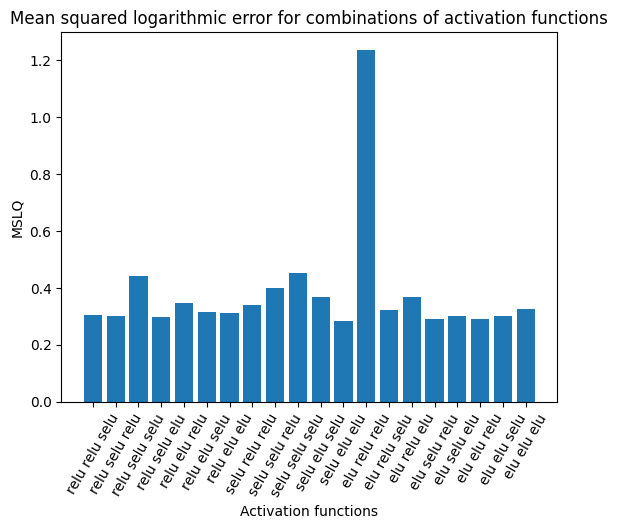

4/4 [==============================] - 0s 5ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


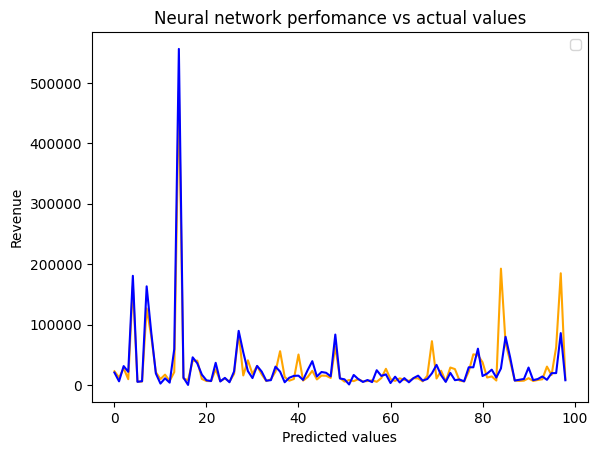

In [55]:
vals = []
newModels = []
print(f"length of models = {len(models)}")
for i in models:
  c = testmodel(i[0])
  #remove networks that are ineffective
  if c <= 5:
    vals.append(c)
    newModels.append(i)
  else:
    pass



barChartErrors(newModels, vals)

makeGraph(newModels[findbest(vals)][0])
#print(f"{testmodel(bestset[0])},{bestset[:-1]}")
#print(e)
#makeGraph(bestset[0])

#print(mean_absolute_error(rTest, bestset[0].predict(sTest)))

combinations of elu and relu seem to peform best, consistently getting loss values between 0.2 and 0.4, sometimes with exceeding those expectations, using adam, 2 hidden layes of 9 and 4
best performance of 0.19 achieved

